## Ejercicios API Frankfurter

In [10]:
import numpy as np
import pandas as pd
import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import requests

from pprint import pprint

In [11]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"sns=={sns.__version__}")
print(f"requests=={requests.__version__}")

numpy==2.0.2
pandas==2.2.3
matplotlib==3.9.2
sns==0.13.2
requests==2.32.3


### Ejercicio 1:

- Definir una función que tome como parámetro un año y una moneda diferente del euro y que muestre la relación entre el euro y la otra moneda en ese año. En la gráfica se debe marcar el máximo y el mínimo. Imprime los endpoints que utilizados para extraer la información.

In [14]:
def plot_evolucion_moneda(currency, year):
    url = "http://api.frankfurter.app" # Establece la URL de la API
    # Define la fecha de inicio para el año dado en formato "AAAA-01-01"
    date = f"{year}-01-01" 
    # Comprueba si el año proporcionado NO es el año actual
    if year != datetime.now().year: 
        # Define la fecha final para el año dado en formato "AAAA-12-31"
        data_ = f"{year}-12-31"
        # Construye el endpoint para solicitar datos desde el inicio hasta el final del año
        endpoint = f"{url}/{date}..{date}?to-{currency}" 
    else:
        # Si el año es el actual, se solicita desde el inicio del año hasta la fecha más reciente
        endpoint = f"{url}/{date}..{date}?to-{currency}"
    # Imprime el endpoint en consola para verificar qué URL se está usando
    print(f"Endpoint: {endpoint}") 
    # Realiza una solicitud GET a la API usando la URL construida
    response = requests.get(endpoint)
    
    # Convierte la respuesta JSON en un diccionario de Python
    data = response.json()
    
    # Convierte todas las fechas disponibles como cadenas desde el diccionario de rates (tasas)
    fechas = list(data["rates"].keys())
    
    # Convierte cada cadena de fecha en un objeto datetime para un manejo adecuada
    fechas = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in fechas]
    
    # Crea una lista con los valores del tipo de cambio para la moneda especificada en cada fecha
    moneda = [data["rates"][fecha][currency] for fecha in data["rates"].keys()]
    
    #Establece el tamaño de la figura para la gráfica
    plt.figure(figsize=(18, 10))
    
    # Genera la gráfica para representar las fechas en el eje X y valores en el eje Y
    plt.plot(fechas, moneda, "-")
    
    # Marca con un punto verde el valor máximo de la moneda y su fecha correspondiente
    plt.plot(fechas[np.argmax(moneda)], np.max(moneda), color="green", marker= "o", markersize = 12)
    
    plt.plot(fechas[np.argmin(moneda)], np.min(moneda), color = "red", marker = "o", markersize = 12)
    
    plt.gcf().autofmt_xdate()
    
    plt.xlabel("Fechas", fontsize = 20)
    
    plt.ylabel(f"{currency}", fontsize = 20)
    
    plt.grid()
    plt.show()

Endpoint: http://api.frankfurter.app/2021-01-01..2021-01-01?to-USD


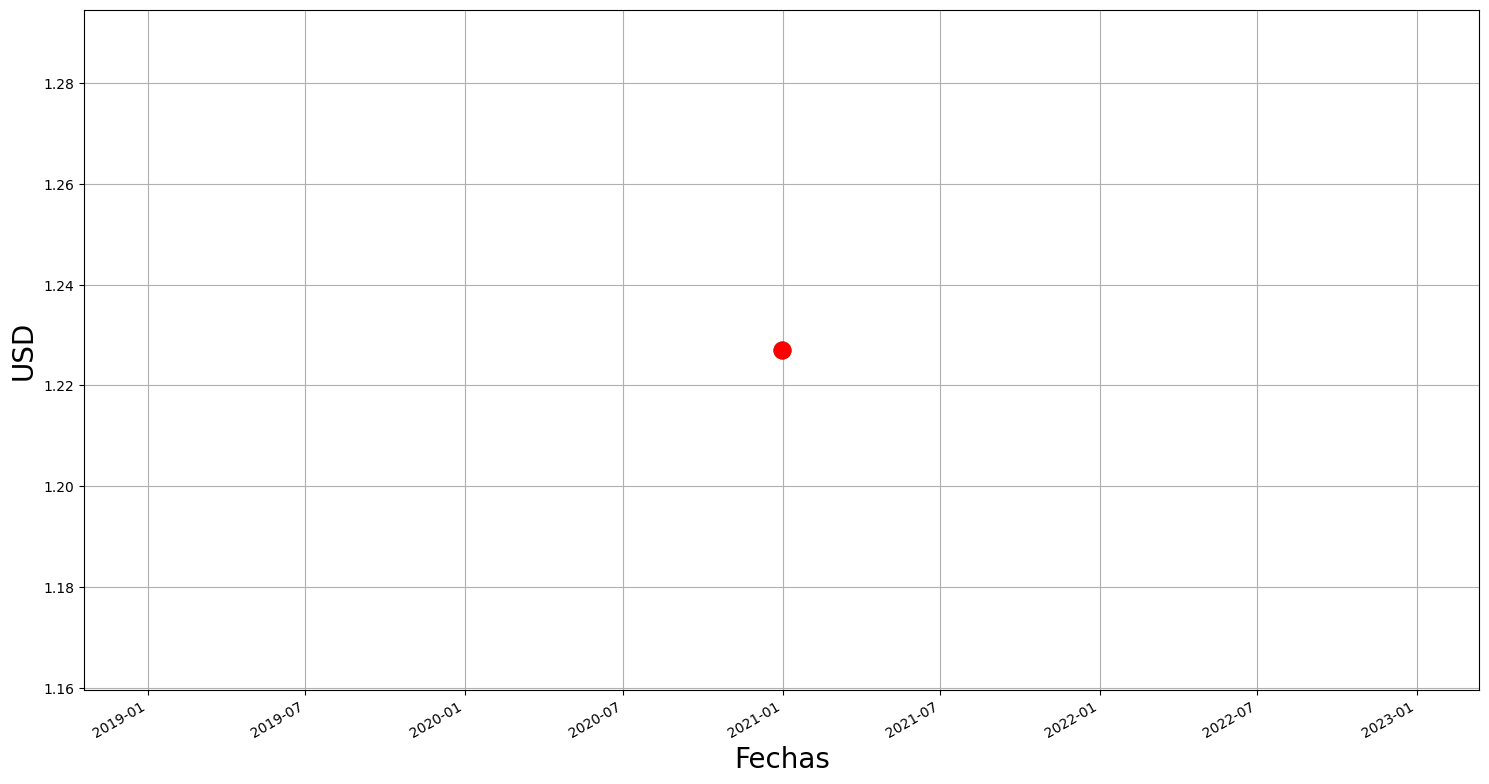

In [15]:
plot_evolucion_moneda("USD", 2021)

### Ejercicio 2:

- Repite el ejercicio 1 pero esta vez agregando al mismo plot tantas monedas como el usuario lo indique. Esta vez no hace falta indicar los máximos y mínimos de cada moneda.

### Ejercicio 3:

- Repite el ejercicio 1 esta vez evaluando la relación de dos monedas que no sean el euro. Muestra el máximo y el mínimo de la relación entre las monedas.